# Zadanie nr 2 - Trie i drzewa sufiksów

In [1]:
#!pip install treelib
from treelib import Tree

In [2]:
from time import time
import matplotlib.pyplot as plt

## 1. Przygotowanie zestawu danych

<i>1. Przyjmij następujący zbiór danych wejściowych: </i>
>* bbbd
>* aabbabd
>* ababcd
>* abcbccd
>* załączony plik. 

In [3]:
test_data = ['bbbd', 'aabbabd', 'ababcd', 'abcabccd']

with open('1997_714_head.txt', 'r') as file:
    text = "".join(file)
    test_data.append(text)

<i>2. Upewnij się, że każdy łańcuch na końcu posiada unikalny znak (marker), a jeśli go nie ma, to dodaj ten znak.</i>

In [4]:
def unique_last_character(text):
    is_unique = text[-1] not in text[:-1]
    
    if is_unique:
        return text
    
    for i in range(36, 1000):
        if chr(i) not in text:
            return text + chr(i)

In [5]:
print("abc ->", unique_last_character("abc"))
print("abb ->", unique_last_character("abb"))

abc -> abc
abb -> abb$


## 2. Implementacja struktury drzewa Trie

<i>3. Zaimplementuj algorytm konstruujący strukturę trie, która przechowuje wszystkie sufiksy łańcucha danego na wejściu.</i>

In [6]:
class TrieNode:
    def __init__(self, char):
        self.char = char
        self.children = {}

    def __str__(self):
        return self.char

    def __lt__(self, other):
        return self.char < other.char

In [7]:
def build_trie(text):
    text = unique_last_character(text)
    head = TrieNode("")

    for suffix_index in range(len(text)):
        current_node = head
        for char_index, char in enumerate(text[suffix_index:]):
            if char in current_node.children:
                current_node = current_node.children[char]
            else:
                for k, char in enumerate(text[suffix_index+char_index:]):
                    new_node = TrieNode(char)
                    current_node.children[char] = new_node
                    current_node = new_node
                break
                
    return head

#### wizualizacja za pomocą biblioteki treelib

In [8]:
def show_trie(text):
    tree = Tree()
    head = build_trie(text)
    tree.create_node(head, head, parent=None)

    def create_tree(node):
        for child in node.children.values():
            tree.create_node(child, child, parent=node)
            create_tree(child)

    create_tree(head)
    print("trie for the word: ", unique_last_character(text))
    tree.show()

In [9]:
show_trie(test_data[0])

trie for the word:  bbbd

├── b
│   ├── b
│   │   ├── b
│   │   │   └── d
│   │   └── d
│   └── d
└── d



In [10]:
show_trie(test_data[1])

trie for the word:  aabbabd

├── a
│   ├── a
│   │   └── b
│   │       └── b
│   │           └── a
│   │               └── b
│   │                   └── d
│   └── b
│       ├── b
│       │   └── a
│       │       └── b
│       │           └── d
│       └── d
├── b
│   ├── a
│   │   └── b
│   │       └── d
│   ├── b
│   │   └── a
│   │       └── b
│   │           └── d
│   └── d
└── d



In [11]:
show_trie(test_data[2])

trie for the word:  ababcd

├── a
│   └── b
│       ├── a
│       │   └── b
│       │       └── c
│       │           └── d
│       └── c
│           └── d
├── b
│   ├── a
│   │   └── b
│   │       └── c
│   │           └── d
│   └── c
│       └── d
├── c
│   └── d
└── d



In [12]:
show_trie(test_data[3])

trie for the word:  abcabccd

├── a
│   └── b
│       └── c
│           ├── a
│           │   └── b
│           │       └── c
│           │           └── c
│           │               └── d
│           └── c
│               └── d
├── b
│   └── c
│       ├── a
│       │   └── b
│       │       └── c
│       │           └── c
│       │               └── d
│       └── c
│           └── d
├── c
│   ├── a
│   │   └── b
│   │       └── c
│   │           └── c
│   │               └── d
│   ├── c
│   │   └── d
│   └── d
└── d



## 3. Implementacja struktury Drzewa Sufiksów 

<i>4. Zaimplementuj algorytm konstruujący drzewo sufiksów.
Upewnij się, że powstałe struktury danych są poprawne. Możesz np. sprawdzić, czy struktura zawiera jakiś ciąg znaków i porównać wyniki z algorytmem wyszukiwania wzorców.</i>


In [13]:
class TreeNode:
    def __init__(self, range):
        self.range = range
        self.children = set()
        self.suffix_number = None

    def __str__(self):
        string = ""
        if self.range[0] < 0:
            return ""
        for i in range(self.range[0], self.range[1]+1):
            string += TreeNode.text[i]
        
        if not self.children:
            string += ' (' + str(self.suffix_number) + ')'
            
        return string

    def __repr__(self):
        return str(self)

    def __lt__(self, other):
        return str(self) < str(other)

In [14]:
def build_tree(text):
    text = unique_last_character(text)
    head = TreeNode(range=(0, -1))

    for suffix_index in range(len(text)):
        current_node = head
        current_index = suffix_index
        found = 0
        while current_index < len(text) and not found:
            skip = 0
            for child in current_node.children:
                common = 0

                for k in range(child.range[0], child.range[1]+1):
                    if text[current_index+common] == text[k]:
                        common += 1
                    else:
                        break

                if common == child.range[1] - child.range[0] + 1:
                    current_node = child
                    current_index += common
                    skip = 1
                    break

                elif common > 0:
                    new_child_1 = TreeNode(
                        range=(child.range[0]+common, child.range[1]))
                    new_child_2 = TreeNode(
                        range=(current_index+common, len(text)-1))

                    new_child_1.children = child.children
                    new_child_1.suffix_number = child.suffix_number
                    current_node = new_child_2

                    child.range = (
                        child.range[0], child.range[0]+common-1)
                    child.children = {new_child_1, new_child_2}
                    found = 1
                    break

            if not found and not skip:
                new_child = TreeNode(range=(current_index, len(text)-1))
                current_node.children.add(new_child)
                current_node = new_child
                break
        
        current_node.suffix_number = suffix_index

    return head

#### wizualizacja za pomocą biblioteki treelib

In [15]:
def show_tree(text, head=None):   
    TreeNode.text = unique_last_character(text)
    if head is None:
        head = build_tree(text)
        
    tree = Tree()
    tree.create_node(head, head, parent=None)

    def create_tree(node):
        for child in node.children:
            tree.create_node(child, child, parent=node)
            create_tree(child)

    create_tree(head)
    print("suffix tree for the word: ", unique_last_character(text))
    tree.show()

In [16]:
show_tree(test_data[0])

suffix tree for the word:  bbbd

├── b
│   ├── b
│   │   ├── bd (0)
│   │   └── d (1)
│   └── d (2)
└── d (3)



In [17]:
show_tree(test_data[1])

suffix tree for the word:  aabbabd

├── a
│   ├── abbabd (0)
│   └── b
│       ├── babd (1)
│       └── d (4)
├── b
│   ├── abd (3)
│   ├── babd (2)
│   └── d (5)
└── d (6)



In [18]:
show_tree(test_data[2])

suffix tree for the word:  ababcd

├── ab
│   ├── abcd (0)
│   └── cd (2)
├── b
│   ├── abcd (1)
│   └── cd (3)
├── cd (4)
└── d (5)



In [19]:
show_tree(test_data[3])

suffix tree for the word:  abcabccd

├── abc
│   ├── abccd (0)
│   └── cd (3)
├── bc
│   ├── abccd (1)
│   └── cd (4)
├── c
│   ├── abccd (2)
│   ├── cd (5)
│   └── d (6)
└── d (7)



## 4. Testy poprawności

Aby sprawdzić poprawność zaimplementowanych struktur, szukam wystąpienia podanego wzorca w tekście i rezultat weryfikuję funkcją dopasowywania wzorca, implementującą algorytm KMP.

In [20]:
def kmp(text, pattern):
    result = []

    pi = prefix_function(pattern)
    q = 0

    for i in range(0, len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q-1]

        if pattern[q] == text[i]:
            q = q + 1

        if q == len(pattern):
            result.append(i + 1 - q)
            q = pi[q-1]

    return result


def prefix_function(pattern):
    pi = [0]
    k = 0

    for q in range(1, len(pattern)):
        while(k > 0 and pattern[k] != pattern[q]):
            k = pi[k-1]

        if(pattern[k] == pattern[q]):
            k = k + 1

        pi.append(k)

    return pi

In [21]:
def string_match_trie(text, pattern):
    node = build_trie(text)
    
    for char in pattern:
        if char in node.children:
            node = node.children[char]
        else:
            return False
        
    return True

In [22]:
text = "aabaabaaaba"
pattern = "aaab"
print(string_match_trie(text, pattern))
print(bool(kmp(text, pattern)))

True
True


In [23]:
text = "aabaabaaaba"
pattern = "aaaab"
print(string_match_trie(text, pattern))
print(bool(kmp(text, pattern)))

False
False


In [24]:
def string_match_tree(text, pattern):
    node = build_tree(text)
    text = unique_last_character(text)
    
    i = 0
    while i < len(pattern):
        for child in node.children:
            for k in range(child.range[0], child.range[1]+1):
                if pattern[i] == text[k]:
                    i += 1
                    if i == len(pattern):
                        return True
                else:
                    break
            else:
                node = child
                break
        else:
            return False

In [25]:
text = "aabaabaaaba"
pattern = "aaab"
print(string_match_tree(text, pattern))
print(bool(kmp(text, pattern)))

True
True


In [26]:
text = "aabaabaaaba"
pattern = "aaaab"
print(string_match_tree(text, pattern))
print(bool(kmp(text, pattern)))

False
False


Dla przeprowadzonych testów obie struktury działały poprawnie.

## 5. Porównanie czasów

<i>5. Porównaj szybkość działania algorytmów konstruujących struktury danych dla danych z p. 1 w następujących wariantach: </i>
> - Trie (1 pkt) - czas budowy drzewa O(n^2), rozmiar drzewa O(n^2), n - długość tekstu, przy założeniu, że rozmiar alfabetu jest stały
> - Drzewo sufiksów bez wykorzystania procedury fast_find oraz elementów "link" (2 pkt) - czas budowy O(n^2), rozmiar drzewa O(n) 

In [27]:
def compare_times(text):
    start = time()
    build_trie(text)
    end = time()
    
    trie_time = end - start
    
    start = time()
    build_tree(text)
    end = time()
    
    tree_time = end - start
    
    print(f'trie building time: {trie_time:.3}s')
    print(f'tree building time: {tree_time:.3}s\n')
    
    fig, ax = plt.subplots()
    ax.bar(["TRIE", "TREE"], [trie_time, tree_time], color="darkseagreen")
    plt.show()

text: bbbd
trie building time: 1.53e-05s
tree building time: 1.55e-05s



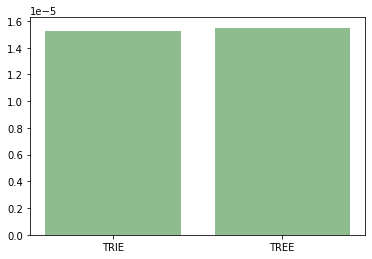

---
text: aabbabd
trie building time: 1.65e-05s
tree building time: 2.15e-05s



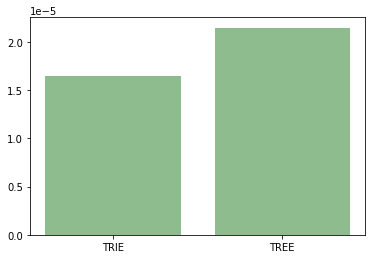

---
text: ababcd
trie building time: 1.93e-05s
tree building time: 2.03e-05s



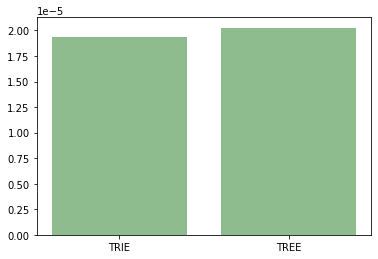

---
text: abcabccd
trie building time: 3.24e-05s
tree building time: 4.03e-05s



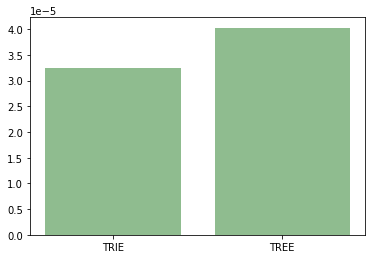

---
text: Dz.U. z 1998 r. (...)
trie building time: 5.37s
tree building time: 0.0565s



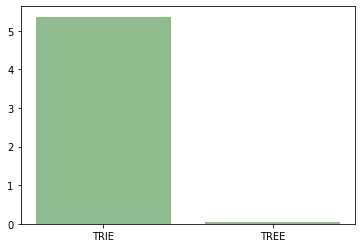

---


In [28]:
for text in test_data:
    text_excerpt = text if len(text) < 20 else text[:20].strip() + ' (...)'
    print(f'text: {text_excerpt}')
    compare_times(text)
    print('---')

Dla krótkich łańcuchów znaków czas potrzebny do budowy struktur był porównywalny. Dla długiego tekstu znacznie szybszy okazał się algorytm tworzenia drzewa sufiksowego, lecz obie implementacje mają złożoność O(n^2).

## Wnioski
 - Struktury Trie oraz Drzewa Sufiksów pozwalają na odnalezienie wystąpienia wzorca w tekście w czasie proporcjonalnym do długości wzorca.
 - Czas potrzebny do budowy struktur zależy od implementacji. Naiwne podejście daje złożoność O(n^2), sprawdzającą się dla krótkich tekstów, jednak istnieją algorytmy liniowe budowy drzewa sufiksów.
 - Złożoność pamięciowa trie to O(n^2), a drzewa sufiksów O(n).

M. Hawryluk, 08.04.2021